In [26]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [27]:
# supress warnings from plotnine

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# load data

df2 = pd.read_csv("df1.csv")
df2.head(10)

,ID,GENDER,Car,Property,Children,Income,Job,Education,Martial_Status,Housing,Age,Employed,Occupation,Family_Size,MONTHS_BALANCE,STATUS,open_month,end_month,window
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Not Listed,2,0,0,-15,0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Not Listed,2,0,0,-14,0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2,0,0,-29,0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0,0,-4,0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,-22,0,-26,-22,4
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0,0,-26,0,26
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0,0,-38,0,38
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,Not Listed,1,-4,0,-20,-4,16
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,Not Listed,1,0,0,-16,0,16
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,Not Listed,1,-1,0,-17,-1,16


In [4]:
# select object columns

dfo = df2.select_dtypes(include=['object'])

df2 = pd.concat([df2.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

# objects converted to boolean

df2

,ID,Children,Income,Age,Employed,Family_Size,MONTHS_BALANCE,STATUS,open_month,end_month,...,Occupation_Low-skill Laborers,Occupation_Managers,Occupation_Medicine staff,Occupation_Not Listed,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,2,0,0,-15,0,...,0,0,0,1,0,0,0,0,0,0
1,5008805,0,427500.0,-12005,-4542,2,0,0,-14,0,...,0,0,0,1,0,0,0,0,0,0
2,5008806,0,112500.0,-21474,-1134,2,0,0,-29,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,270000.0,-19110,-3051,1,0,0,-4,0,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,270000.0,-19110,-3051,1,-22,0,-26,-22,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,315000.0,-17348,-2420,2,0,1,-11,0,...,0,1,0,0,0,0,0,0,0,0
36453,5149834,0,157500.0,-12387,-1325,2,0,1,-23,0,...,0,0,1,0,0,0,0,0,0,0
36454,5149838,0,157500.0,-12387,-1325,2,0,1,-32,0,...,0,0,1,0,0,0,0,0,0,0
36455,5150049,0,283500.0,-17958,-655,2,0,1,-9,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df2.drop(['MONTHS_BALANCE', 'open_month', 'end_month'], axis=1, inplace=True)
df2

,ID,Children,Income,Age,Employed,Family_Size,STATUS,window,GENDER_F,GENDER_M,...,Occupation_Low-skill Laborers,Occupation_Managers,Occupation_Medicine staff,Occupation_Not Listed,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,2,0,15,0,1,...,0,0,0,1,0,0,0,0,0,0
1,5008805,0,427500.0,-12005,-4542,2,0,14,0,1,...,0,0,0,1,0,0,0,0,0,0
2,5008806,0,112500.0,-21474,-1134,2,0,29,0,1,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,270000.0,-19110,-3051,1,0,4,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,270000.0,-19110,-3051,1,0,4,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,315000.0,-17348,-2420,2,1,11,0,1,...,0,1,0,0,0,0,0,0,0,0
36453,5149834,0,157500.0,-12387,-1325,2,1,23,1,0,...,0,0,1,0,0,0,0,0,0,0
36454,5149838,0,157500.0,-12387,-1325,2,1,32,1,0,...,0,0,1,0,0,0,0,0,0,0
36455,5150049,0,283500.0,-17958,-655,2,1,9,1,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
#Split the variables

X = df2.iloc[:, :2].values
y = df2.iloc[:, -1].values

In [28]:
from sklearn.model_selection import train_test_split


# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2718)

In [29]:
print(X_train.shape)
print(X_test.shape)

(25519, 2)
(10938, 2)


In [30]:
# Feature Scaling


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [31]:
# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =2718)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=2718)

In [32]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [34]:
# Making the Confusion Matrix


cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

99.57944779667216


In [36]:
df2['STATUS'].value_counts(normalize=True)

0    0.983103
1    0.016897
Name: STATUS, dtype: float64

In [37]:
!pip install imbalanced-learn

In [38]:
# check version number

import imblearn
print(imblearn.__version__)

0.8.1


In [39]:
# determine which model performs the best

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
    
}

In [43]:
# Train/Test Split

len(df2) * .7, len(df2) * .3

(25519.899999999998, 10937.1)

In [44]:
# define min max scaler

scaler = MinMaxScaler()

# transform data

scaled = scaler.fit_transform(df2)

print(df2)

            ID  Children    Income    Age  Employed  Family_Size  STATUS  \
0      5008804         0  427500.0 -12005     -4542            2       0   
1      5008805         0  427500.0 -12005     -4542            2       0   
2      5008806         0  112500.0 -21474     -1134            2       0   
3      5008808         0  270000.0 -19110     -3051            1       0   
4      5008809         0  270000.0 -19110     -3051            1       0   
...        ...       ...       ...    ...       ...          ...     ...   
36452  5149828         0  315000.0 -17348     -2420            2       1   
36453  5149834         0  157500.0 -12387     -1325            2       1   
36454  5149838         0  157500.0 -12387     -1325            2       1   
36455  5150049         0  283500.0 -17958      -655            2       1   
36456  5150337         0  112500.0  -9188     -1193            1       1   

       window  GENDER_F  GENDER_M  ...  Occupation_Low-skill Laborers  \
0          15 

In [45]:
df2

,ID,Children,Income,Age,Employed,Family_Size,STATUS,window,GENDER_F,GENDER_M,...,Occupation_Low-skill Laborers,Occupation_Managers,Occupation_Medicine staff,Occupation_Not Listed,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,2,0,15,0,1,...,0,0,0,1,0,0,0,0,0,0
1,5008805,0,427500.0,-12005,-4542,2,0,14,0,1,...,0,0,0,1,0,0,0,0,0,0
2,5008806,0,112500.0,-21474,-1134,2,0,29,0,1,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,270000.0,-19110,-3051,1,0,4,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,270000.0,-19110,-3051,1,0,4,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,315000.0,-17348,-2420,2,1,11,0,1,...,0,1,0,0,0,0,0,0,0,0
36453,5149834,0,157500.0,-12387,-1325,2,1,23,1,0,...,0,0,1,0,0,0,0,0,0,0
36454,5149838,0,157500.0,-12387,-1325,2,1,32,1,0,...,0,0,1,0,0,0,0,0,0,0
36455,5150049,0,283500.0,-17958,-655,2,1,9,1,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
# define standard scaler

scaler = StandardScaler()

# transform data

scaled = scaler.fit_transform(df2)
print(df2)

            ID  Children    Income    Age  Employed  Family_Size  STATUS  \
0      5008804         0  427500.0 -12005     -4542            2       0   
1      5008805         0  427500.0 -12005     -4542            2       0   
2      5008806         0  112500.0 -21474     -1134            2       0   
3      5008808         0  270000.0 -19110     -3051            1       0   
4      5008809         0  270000.0 -19110     -3051            1       0   
...        ...       ...       ...    ...       ...          ...     ...   
36452  5149828         0  315000.0 -17348     -2420            2       1   
36453  5149834         0  157500.0 -12387     -1325            2       1   
36454  5149838         0  157500.0 -12387     -1325            2       1   
36455  5150049         0  283500.0 -17958      -655            2       1   
36456  5150337         0  112500.0  -9188     -1193            1       1   

       window  GENDER_F  GENDER_M  ...  Occupation_Low-skill Laborers  \
0          15 

(36457, 54)
                 ID      Children        Income           Age       Employed  \
count  3.645700e+04  36457.000000  3.645700e+04  36457.000000   36457.000000   
mean   5.078227e+06      0.430315  1.866857e+05 -15975.173382   59262.935568   
std    4.187524e+04      0.742367  1.017892e+05   4200.549944  137651.334859   
min    5.008804e+06      0.000000  2.700000e+04 -25152.000000  -15713.000000   
25%    5.042028e+06      0.000000  1.215000e+05 -19438.000000   -3153.000000   
50%    5.074614e+06      0.000000  1.575000e+05 -15563.000000   -1552.000000   
75%    5.115396e+06      1.000000  2.250000e+05 -12462.000000    -408.000000   
max    5.150487e+06     19.000000  1.575000e+06  -7489.000000  365243.000000   

        Family_Size        STATUS        window      GENDER_F      GENDER_M  \
count  36457.000000  36457.000000  36457.000000  36457.000000  36457.000000   
mean       2.198453      0.016897     20.332392      0.670105      0.329895   
std        0.911686      0.128

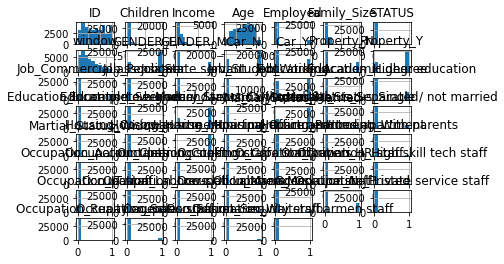

In [47]:
from matplotlib import pyplot

# summarize the shape of the dataset
print(df2.shape)

# summarize each variable
print(df2.describe())

# histograms of the variables
df2.hist()
pyplot.show()

In [48]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler


scaler.mean_


scaler.scale_


X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.26063724, -0.57622567],
       [-1.28826336, -0.57622567],
       [ 1.71238579, -0.57622567],
       ...,
       [-1.18960743, -0.57622567],
       [ 0.2713455 , -0.57622567],
       [ 1.37695087, -0.57622567]])

In [49]:
X_scaled.mean(axis=0)


X_scaled.std(axis=0)

array([1., 1.])

In [50]:
# Making a Scaler object

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

 # apply scaling on training data
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 


# apply scaling on testing data, without leaking training data.
pipe.score(X_test, y_test)  

0.96

In [51]:
# Fitting data to the scaler object

scaler = StandardScaler()
print(scaler.fit(df2))

StandardScaler()


In [52]:
print(scaler.mean_)

[ 5.07822700e+06  4.30315166e-01  1.86685737e+05 -1.59751734e+04
  5.92629356e+04  2.19845297e+00  1.68966179e-02  2.03323916e+01
  6.70104507e-01  3.29895493e-01  6.20292399e-01  3.79707601e-01
  3.27810846e-01  6.72189154e-01  2.32877088e-01  1.68746743e-01
  8.18772801e-02  3.01725320e-04  5.16197164e-01  8.77746386e-04
  2.70565324e-01  3.86757001e-02  1.02586609e-02  6.79622569e-01
  8.07800971e-02  6.87055984e-01  5.76843953e-02  1.32457416e-01
  4.20221082e-02  4.60816853e-03  8.92777793e-01  3.09405601e-02
  7.18654854e-03  1.57720054e-02  4.87149244e-02  3.40401020e-02
  1.51136956e-02  1.79663713e-02  9.84996023e-02  5.86444304e-02
  2.33151384e-03  3.79351016e-02  1.64577447e-03  1.70365088e-01
  4.80017555e-03  8.26178786e-02  3.31074965e-02  3.10585073e-01
  9.43577365e-03  2.16693639e-03  9.55920674e-02  4.14186576e-03
  1.62383081e-02  4.77274597e-03]
